In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
data = pd.read_csv(r"C:\Users\PC\Desktop\PL\eplmatches.csv")

EDA

In [232]:
data.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11646 entries, 0 to 11645
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  11646 non-null  int64 
 1   Wk               11646 non-null  int64 
 2   Date             11646 non-null  object
 3   Home             11646 non-null  object
 4   HomeGoals        11646 non-null  int64 
 5   AwayGoals        11646 non-null  int64 
 6   Away             11646 non-null  object
 7   FTR              11646 non-null  object
dtypes: int64(4), object(4)
memory usage: 728.0+ KB


In [234]:
data.describe()

,Season_End_Year,Wk,HomeGoals,AwayGoals
count,11646.000000,11646.000000,11646.000000,11646.000000
mean,2007.214838,19.738022,1.520780,1.140048
std,8.781986,11.128955,1.302456,1.132243
min,1993.000000,1.000000,0.000000,0.000000
25%,2000.000000,10.000000,1.000000,0.000000
50%,2007.000000,20.000000,1.000000,1.000000
75%,2015.000000,29.000000,2.000000,2.000000
max,2022.000000,42.000000,9.000000,9.000000


In [235]:
data.dtypes

Season_End_Year     int64
Wk                  int64
Date               object
Home               object
HomeGoals           int64
AwayGoals           int64
Away               object
FTR                object
dtype: object

In [236]:
data.corr()

C:\Users\PC\AppData\Local\Temp\ipykernel_11672\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Season_End_Year,Wk,HomeGoals,AwayGoals
Season_End_Year,1.000000,-0.032186,0.001854,0.046140
Wk,-0.032186,1.000000,0.019704,-0.005171
HomeGoals,0.001854,0.019704,1.000000,-0.050975
AwayGoals,0.046140,-0.005171,-0.050975,1.000000


Funtion get team home stats

In [237]:
def get_team_home_stats(team,season):
    
    if(team in data['Home'].values and season in data['Season_End_Year'].values):
        
        # Filetering the team
        mask1 = data['Home'] == team
        mask2 = data['Season_End_Year'] == season
        team_stats = data[mask1 & mask2]

        
        # Home Wins
        mask = team_stats['FTR'] == 'H'
        home_wins = team_stats[mask]
        print("------------------------------------ HOME WINS ----------------------------------------\n")
        print(home_wins.to_string(index=False))
        print()
        goals_sc = home_wins['HomeGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = home_wins['AwayGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        
        print("\n--------------------------------------------------------------------------------------\n")
        
        # Home Draws 
        mask = team_stats['FTR'] == 'D'
        home_draws = team_stats[mask]
        print("------------------------------------ HOME DRAWS ---------------------------------------\n")
        print(home_draws.to_string(index=False))
        print()
        goals_sc = home_draws['HomeGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = home_draws['AwayGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        print("\n---------------------------------------------------------------------------------------\n")
        
        # Home Losses
        mask = team_stats['FTR'] == 'A'
        home_lost = team_stats[mask]
        print("------------------------------------ HOME LOSSES ----------------------------------------\n")
        print(home_lost.to_string(index=False))
        print()
        goals_sc = home_lost['HomeGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = home_lost['AwayGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        print("\n-----------------------------------------------------------------------------------------\n")
        print("------------------------------------ OVERALL-------------------------------------------\n")
        print('Total Home Games : ', len(team_stats))
        print('Home Win ', len(home_wins))
        print('Home Draw :', len(home_draws))
        print('Home Lose :', len(home_lost))
        print('Win Rate :', round(len(home_wins)/len(team_stats), 2))

        # Bar Representation
        x = ["Wins","Draws","Losses"]
        y = [home_wins.shape[0], home_draws.shape[0], home_lost.shape[0]]
        plt.bar(x,y,color=['green', 'gray', 'red'])
        plt.show()
        
    else:
        return 'Opps No Data Available'

Funtion get team away stats

In [238]:
def get_team_away_stats(team,season):
    
    if(team in data['Away'].values and season in data['Season_End_Year'].values):
        
        # Filetering the team
        mask1 = data['Away'] == team
        mask2 = data['Season_End_Year'] == season
        team_stats = data[mask1 & mask2]

        
        # Away Wins
        mask = team_stats['FTR'] == 'A'
        away_wins = team_stats[mask]
        print("------------------------------------ AWAY WINS ----------------------------------------\n")
        print(away_wins.to_string(index=False))
        print()
        goals_sc = away_wins['AwayGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = away_wins['HomeGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        print("\n--------------------------------------------------------------------------------------\n")
        
        # Away Draws 
        mask = team_stats['FTR'] == 'D'
        away_draws = team_stats[mask]
        print("------------------------------------ AWAY DRAWS ---------------------------------------\n")
        print(away_draws.to_string(index=False))
        print()
        goals_sc = away_draws['AwayGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = away_draws['HomeGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        print("\n---------------------------------------------------------------------------------------\n")
        
        # Away Losses
        mask = team_stats['FTR'] == 'H'
        away_lost = team_stats[mask]
        print("------------------------------------ AWAY LOSSES ----------------------------------------\n")
        print(away_lost.to_string(index=False))
        print()
        goals_sc = away_lost['AwayGoals'].sum()
        print('Goals Scored : ',goals_sc)
        goals_cs = away_lost['HomeGoals'].sum()
        print('Goals Conceded : ',goals_cs)
        print("\n-----------------------------------------------------------------------------------------\n")
        print("------------------------------------ OVERALL-------------------------------------------\n")
        print('Total Away Games : ', len(team_stats))
        print('Away Win :', len(away_wins))
        print('Away Draw :', len(away_draws))
        print('Away Lose :', len(away_lost))
        print('Win Rate :', round(len(away_wins)/len(team_stats), 2))
        # Bar Representation
        x = ["Wins","Draws","Losses"]
        y = [away_wins.shape[0], away_draws.shape[0], away_lost.shape[0]]
        plt.bar(x,y,color=['green', 'gray', 'red'])
        plt.show()
        
    else:
        return 'Opps No Data Available'

Season 2019 - Big six analysis

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals           Away FTR
            2019   1 2018-08-10 Manchester Utd          2          1 Leicester City   H
            2019  10 2018-10-28 Manchester Utd          2          1        Everton   H
            2019  16 2018-12-08 Manchester Utd          4          1         Fulham   H
            2019  19 2018-12-26 Manchester Utd          3          1   Huddersfield   H
            2019  20 2018-12-30 Manchester Utd          4          1    Bournemouth   H
            2019  23 2019-01-19 Manchester Utd          2          1       Brighton   H
            2019  29 2019-03-02 Manchester Utd          3          2    Southampton   H
            2019  32 2019-03-30 Manchester Utd          2          1        Watford   H
            2019  34 2019-04-13 Manchester Utd          2          1       West Ham   H
            2019   8 2018-10-06

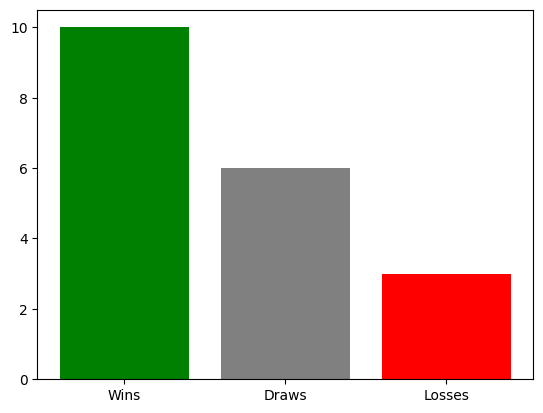

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals           Away FTR
            2019  11 2018-11-03    Bournemouth          1          2 Manchester Utd   A
            2019  18 2018-12-22   Cardiff City          1          5 Manchester Utd   A
            2019  21 2019-01-02  Newcastle Utd          0          2 Manchester Utd   A
            2019  22 2019-01-13      Tottenham          0          1 Manchester Utd   A
            2019  25 2019-02-03 Leicester City          0          1 Manchester Utd   A
            2019  26 2019-02-09         Fulham          0          3 Manchester Utd   A
            2019  28 2019-02-27 Crystal Palace          1          3 Manchester Utd   A
            2019   4 2018-09-02        Burnley          0          2 Manchester Utd   A
            2019   5 2018-09-15        Watford          1          2 Manchester Utd   A

Goals Scored :  21
Goals Conce

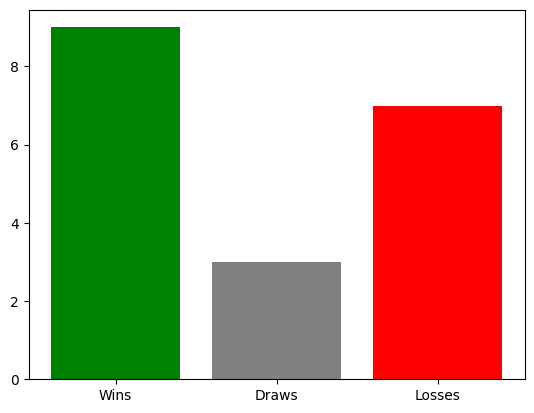

In [239]:
get_team_home_stats('Manchester Utd', 2019)
get_team_away_stats('Manchester Utd', 2019)

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date      Home  HomeGoals  AwayGoals           Away FTR
            2019   1 2018-08-12 Liverpool          4          0       West Ham   H
            2019  10 2018-10-27 Liverpool          4          1   Cardiff City   H
            2019  12 2018-11-11 Liverpool          2          0         Fulham   H
            2019  14 2018-12-02 Liverpool          1          0        Everton   H
            2019  17 2018-12-16 Liverpool          3          1 Manchester Utd   H
            2019  19 2018-12-26 Liverpool          4          0  Newcastle Utd   H
            2019  20 2018-12-29 Liverpool          5          1        Arsenal   H
            2019  23 2019-01-19 Liverpool          4          3 Crystal Palace   H
            2019  26 2019-02-09 Liverpool          3          0    Bournemouth   H
            2019  28 2019-02-27 Liverpool          5          0        Watford   

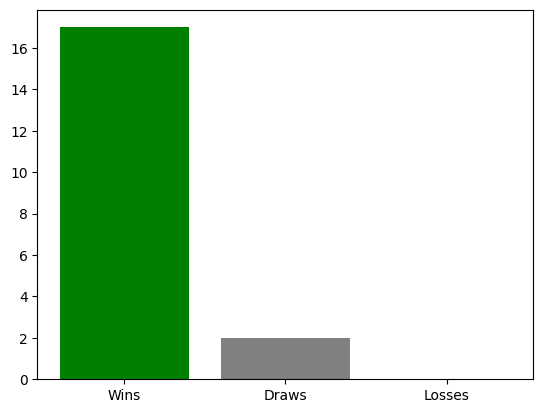

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals      Away FTR
            2019  13 2018-11-24        Watford          0          3 Liverpool   A
            2019  15 2018-12-05        Burnley          1          3 Liverpool   A
            2019  16 2018-12-08    Bournemouth          0          4 Liverpool   A
            2019  18 2018-12-21         Wolves          0          2 Liverpool   A
            2019   2 2018-08-20 Crystal Palace          0          2 Liverpool   A
            2019  22 2019-01-12       Brighton          0          1 Liverpool   A
            2019  31 2019-03-17         Fulham          1          2 Liverpool   A
            2019  33 2019-04-05    Southampton          1          3 Liverpool   A
            2019  35 2019-04-21   Cardiff City          0          2 Liverpool   A
            2019  37 2019-05-04  Newcastle Utd          2          3 Liverpool   

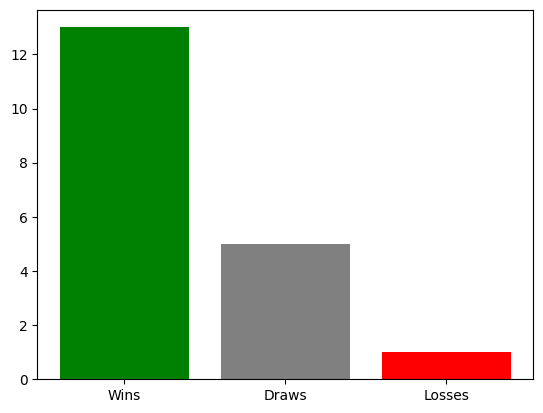

In [240]:
get_team_home_stats('Liverpool', 2019)
get_team_away_stats('Liverpool', 2019)

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date    Home  HomeGoals  AwayGoals            Away FTR
            2019  11 2018-11-04 Chelsea          3          1  Crystal Palace   H
            2019  14 2018-12-02 Chelsea          2          0          Fulham   H
            2019  16 2018-12-08 Chelsea          2          0 Manchester City   H
            2019   2 2018-08-18 Chelsea          3          2         Arsenal   H
            2019  22 2019-01-12 Chelsea          2          1   Newcastle Utd   H
            2019  25 2019-02-02 Chelsea          5          0    Huddersfield   H
            2019  27 2019-04-03 Chelsea          3          0        Brighton   H
            2019  28 2019-02-27 Chelsea          2          0       Tottenham   H
            2019  33 2019-04-08 Chelsea          2          0        West Ham   H
            2019  37 2019-05-05 Chelsea          3          0         Watford   H
         

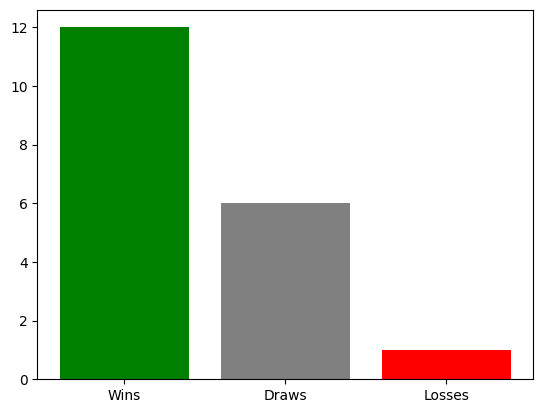

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals    Away FTR
            2019   1 2018-08-11   Huddersfield          0          3 Chelsea   A
            2019  10 2018-10-28        Burnley          0          4 Chelsea   A
            2019  17 2018-12-16       Brighton          1          2 Chelsea   A
            2019  19 2018-12-26        Watford          1          2 Chelsea   A
            2019  20 2018-12-30 Crystal Palace          0          1 Chelsea   A
            2019  29 2019-03-03         Fulham          1          2 Chelsea   A
            2019   3 2018-08-26  Newcastle Utd          1          2 Chelsea   A
            2019  32 2019-03-31   Cardiff City          1          2 Chelsea   A
            2019   8 2018-10-07    Southampton          0          3 Chelsea   A

Goals Scored :  21
Goals Conceded :  5

------------------------------------------------------------

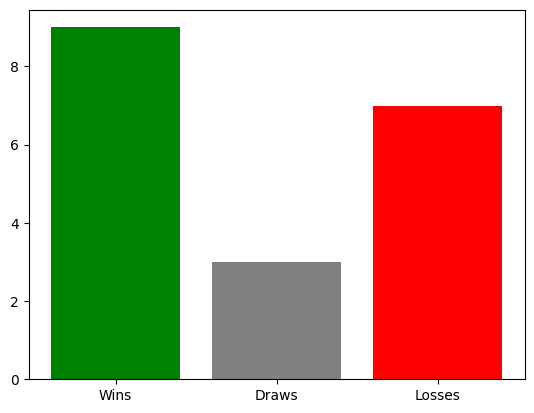

In [241]:
get_team_home_stats('Chelsea', 2019)
get_team_away_stats('Chelsea', 2019)

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date    Home  HomeGoals  AwayGoals           Away FTR
            2019  14 2018-12-02 Arsenal          4          2      Tottenham   H
            2019  16 2018-12-08 Arsenal          1          0   Huddersfield   H
            2019  18 2018-12-22 Arsenal          3          1        Burnley   H
            2019  21 2019-01-01 Arsenal          4          1         Fulham   H
            2019  23 2019-01-19 Arsenal          2          0        Chelsea   H
            2019  24 2019-01-29 Arsenal          2          1   Cardiff City   H
            2019  27 2019-02-24 Arsenal          2          0    Southampton   H
            2019  28 2019-02-27 Arsenal          5          1    Bournemouth   H
            2019   3 2018-08-25 Arsenal          3          1       West Ham   H
            2019  30 2019-03-10 Arsenal          2          0 Manchester Utd   H
            2019  32

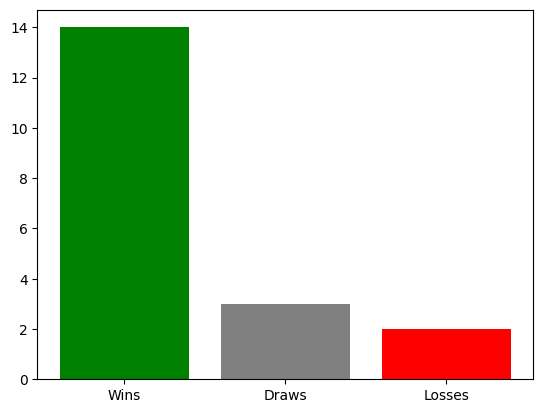

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date          Home  HomeGoals  AwayGoals    Away FTR
            2019  13 2018-11-25   Bournemouth          1          2 Arsenal   A
            2019  26 2019-02-09  Huddersfield          1          2 Arsenal   A
            2019  34 2019-04-15       Watford          0          1 Arsenal   A
            2019  38 2019-05-12       Burnley          1          3 Arsenal   A
            2019   4 2018-09-02  Cardiff City          2          3 Arsenal   A
            2019   5 2018-09-15 Newcastle Utd          1          2 Arsenal   A
            2019   8 2018-10-07        Fulham          1          5 Arsenal   A

Goals Scored :  18
Goals Conceded :  7

--------------------------------------------------------------------------------------

------------------------------------ AWAY DRAWS ---------------------------------------

 Season_End_Year  Wk       Date           Home  HomeG

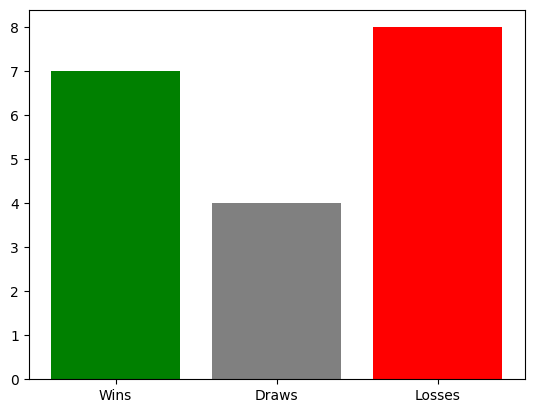

In [242]:
get_team_home_stats('Arsenal', 2019)
get_team_away_stats('Arsenal', 2019)

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date            Home  HomeGoals  AwayGoals           Away FTR
            2019  11 2018-11-04 Manchester City          6          1    Southampton   H
            2019  12 2018-11-11 Manchester City          3          1 Manchester Utd   H
            2019  14 2018-12-01 Manchester City          3          1    Bournemouth   H
            2019  17 2018-12-15 Manchester City          3          1        Everton   H
            2019   2 2018-08-19 Manchester City          6          1   Huddersfield   H
            2019  21 2019-01-03 Manchester City          2          1      Liverpool   H
            2019  22 2019-01-14 Manchester City          3          0         Wolves   H
            2019  25 2019-02-03 Manchester City          3          1        Arsenal   H
            2019  26 2019-02-10 Manchester City          6          0        Chelsea   H
            2019  28 

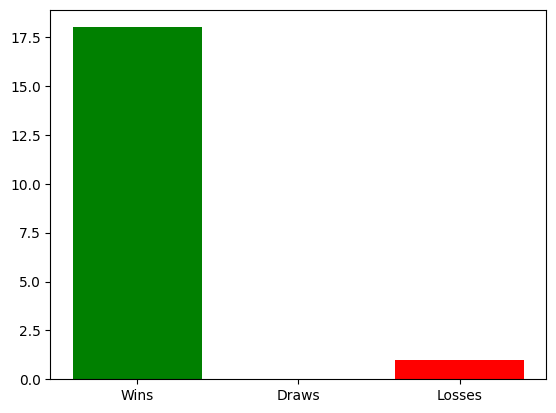

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals            Away FTR
            2019   1 2018-08-12        Arsenal          0          2 Manchester City   A
            2019  10 2018-10-29      Tottenham          0          1 Manchester City   A
            2019  13 2018-11-24       West Ham          0          4 Manchester City   A
            2019  15 2018-12-04        Watford          1          2 Manchester City   A
            2019  20 2018-12-30    Southampton          1          3 Manchester City   A
            2019  23 2019-01-20   Huddersfield          0          3 Manchester City   A
            2019  27 2019-02-06        Everton          0          2 Manchester City   A
            2019  29 2019-03-02    Bournemouth          0          1 Manchester City   A
            2019  31 2019-04-24 Manchester Utd          0          2 Manchester City   A
            2019  32 

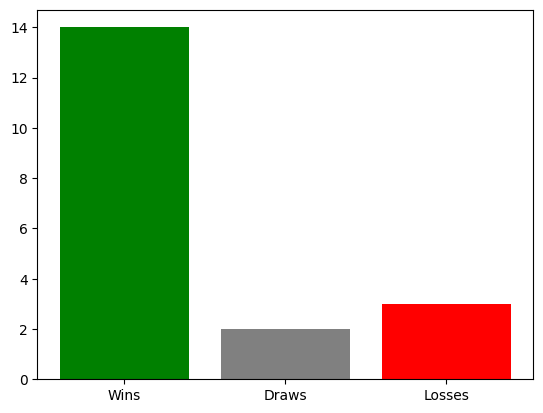

In [243]:
get_team_home_stats('Manchester City', 2019)
get_team_away_stats('Manchester City', 2019)

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date      Home  HomeGoals  AwayGoals           Away FTR
            2019  13 2018-11-24 Tottenham          3          1        Chelsea   H
            2019  15 2018-12-05 Tottenham          3          1    Southampton   H
            2019  17 2018-12-15 Tottenham          1          0        Burnley   H
            2019  19 2018-12-26 Tottenham          5          0    Bournemouth   H
            2019   2 2018-08-18 Tottenham          3          1         Fulham   H
            2019  24 2019-01-30 Tottenham          2          1        Watford   H
            2019  25 2019-02-02 Tottenham          1          0  Newcastle Utd   H
            2019  26 2019-02-10 Tottenham          3          1 Leicester City   H
            2019  31 2019-04-03 Tottenham          2          0 Crystal Palace   H
            2019  33 2019-04-23 Tottenham          1          0       Brighton   

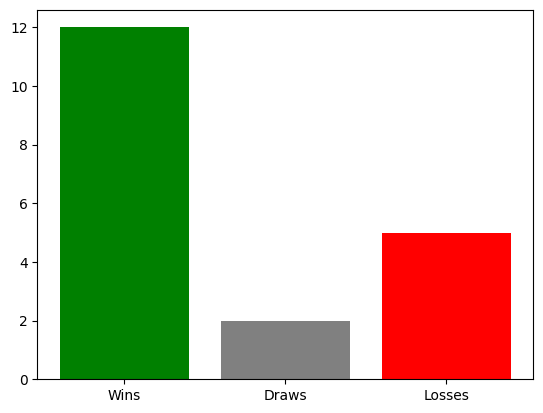

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals      Away FTR
            2019   1 2018-08-11  Newcastle Utd          1          2 Tottenham   A
            2019  11 2018-11-03         Wolves          2          3 Tottenham   A
            2019  12 2018-11-10 Crystal Palace          0          1 Tottenham   A
            2019  16 2018-12-08 Leicester City          0          2 Tottenham   A
            2019  18 2018-12-23        Everton          2          6 Tottenham   A
            2019  21 2019-01-01   Cardiff City          0          3 Tottenham   A
            2019  23 2019-01-20         Fulham          1          2 Tottenham   A
            2019   3 2018-08-27 Manchester Utd          0          3 Tottenham   A
            2019   6 2018-09-22       Brighton          1          2 Tottenham   A
            2019   7 2018-09-29   Huddersfield          0          2 Tottenham   

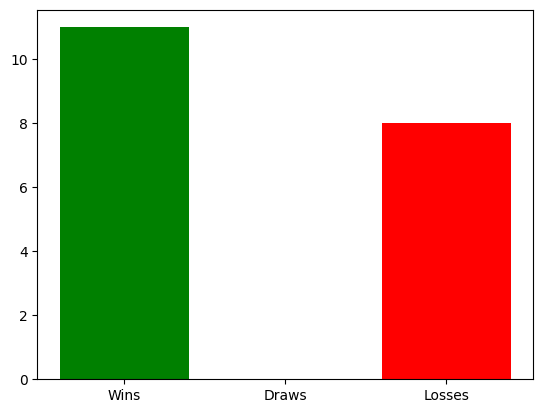

In [244]:
get_team_home_stats('Tottenham', 2019)
get_team_away_stats('Tottenham', 2019)

In the big six all teams have more wins than losses regardless of home or away (home Arsenal is an exception), however home win percentage is greater than away, it is likely that the qualifications of the teams in the big six group are more qualified than the rest of the teams. To verify, we will conduct an analysis of the remaining teams

------------------------------------ HOME WINS ----------------------------------------

 Season_End_Year  Wk       Date    Home  HomeGoals  AwayGoals           Away FTR
            2019  11 2018-11-03 Everton          3          1       Brighton   H
            2019  13 2018-11-24 Everton          1          0   Cardiff City   H
            2019   2 2018-08-18 Everton          2          1    Southampton   H
            2019  22 2019-01-13 Everton          2          0    Bournemouth   H
            2019  31 2019-03-17 Everton          2          0        Chelsea   H
            2019  33 2019-04-07 Everton          1          0        Arsenal   H
            2019  35 2019-04-21 Everton          4          0 Manchester Utd   H
            2019  37 2019-05-03 Everton          2          0        Burnley   H
            2019   7 2018-09-29 Everton          3          0         Fulham   H
            2019   9 2018-10-21 Everton          2          0 Crystal Palace   H

Goals Scored :  22


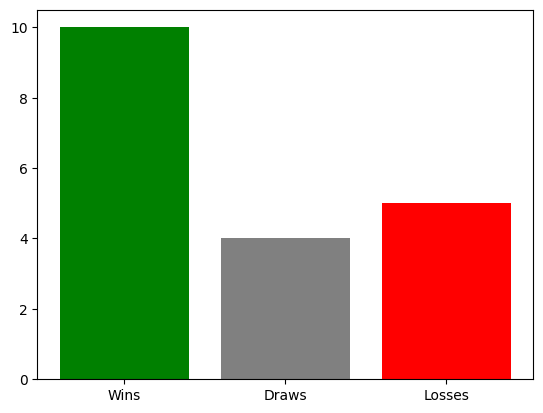

------------------------------------ AWAY WINS ----------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals    Away FTR
            2019  19 2018-12-26        Burnley          1          5 Everton   A
            2019  24 2019-01-29   Huddersfield          0          1 Everton   A
            2019  28 2019-02-26   Cardiff City          0          3 Everton   A
            2019  32 2019-03-30       West Ham          0          2 Everton   A
            2019   8 2018-10-06 Leicester City          1          2 Everton   A

Goals Scored :  13
Goals Conceded :  2

--------------------------------------------------------------------------------------

------------------------------------ AWAY DRAWS ---------------------------------------

 Season_End_Year  Wk       Date           Home  HomeGoals  AwayGoals    Away FTR
            2019   1 2018-08-11         Wolves          2          2 Everton   D
            2019  12 2018-11-11        Chelse

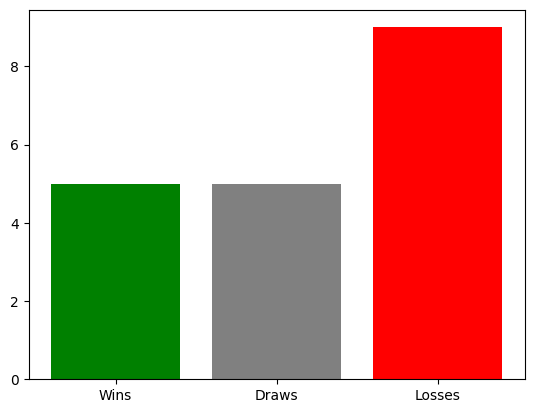

In [246]:
get_team_home_stats('Everton', 2019)
get_team_away_stats('Everton', 2019)

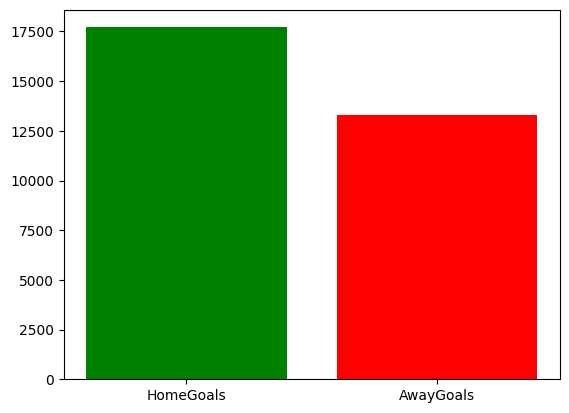

In [245]:
x = ['HomeGoals', 'AwayGoals']
y = [data['HomeGoals'].sum(), data['AwayGoals'].sum()]
plt.bar(x, y, color = ['green', 'red'])
plt.show()

There is a significant difference in the total number of goals at home and away.